# 혼동행렬(Confusion-Matrix)
분류 모델의 성능 평가 지표로써 지도학습을 통해 모델링한 __분류 모델이 예측한 값__ 과 레이블 되어 있는 __원래의 결과 값__ 간의 관계를 표로 나타내며 __좌상단에서 우하단으로 가는 대각선의 값이 높을수록__ 예측을 잘 이루어졌다는 의미다.

> 혼동 행렬을 통해 모델의 정확도(accuracy), 정밀도(precision), 민감도(sensitivity), f1 score 등을 파악할 수 있다. ([성능 평가 지표 구하기](https://github.com/BOSOEK/TIL/blob/main/A.I/Classification-performance-evaluation.md))

<img src='https://user-images.githubusercontent.com/68007145/137417559-88a972d3-e7cb-4c59-ab36-88bcaf2e19c8.png'>

* TP(True Positive) : 실제 값이 Positive인 경우를 올바르게 예측
* TN(True Negative) : 실제 값이 Negative인 경우를 올바르게 예측
* FP(False Positive) : 실제 값이 Negative인 경우를 Positive로 잘못 예측
* FN(False Negative) : 실제 값이 Positive인 경우를 Negative로 잘못 예측


In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from numpy import linalg as LA

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

%matplotlib inline
sns.set(font_scale=2)

Confusion Matrix 시각화는 ```seaborn.heatmap``` 과 ```sklearn.metrics.plot_confusion_matrix``` 방법이 있습니다.

## Heatmap
### 1. Basic confusion matrix
* seaborn의 heatmap은 confusion matrix를 시각화 하는 함수로써 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자를 나타냄.

In [37]:
arr = [[5, 0, 2, 0],
       [1, 10, 0, 0],
       [2, 3, 11, 0],
       [0, 0, 1, 9]]
df = DataFrame(arr, index=[i for i in 'ABCD'],
               columns=[i for i in 'ABCD'])
df

,A,B,C,D
A,5,0,2,0
B,1,10,0,0
C,2,3,11,0
D,0,0,1,9


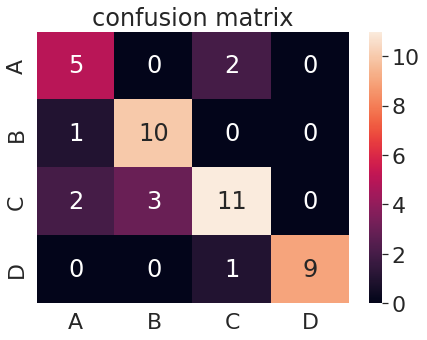

In [38]:
plt.figure(figsize=(7, 5))
plt.title('confusion matrix')
sns.heatmap(df, annot=True)

### Heatmap 매개변수
* vmin : 색으로 표현하는 값의 최소값(최소값 이하는 모두 검은색)
* vmax : 색으로 표현하는 최대값(최대값 이상은 모두 흰색)
* cbar : True면 컬러바가 생긴다.
* center : 중앙값을 지정한다.(중앙값은 검은색)
* linewidths : 각 cell 사이의 선의 굵기
* annot : True면 cell의 값을 표기
* fmt : cell의 데이터 타입 설정
* cmap : 색상 지정([예시](https://chrisalbon.com/code/python/data_visualization/seaborn_color_palettes/))

### 2. Normalization Confusion matrix

* 정규화(normalization) 하지 않은 혼동행렬(confusion matrix)
    > 정규화를 하지 않으면 test input의 분포를 모르기 때문에 어떤 알파벳에 효율적인지 말할 수 없음


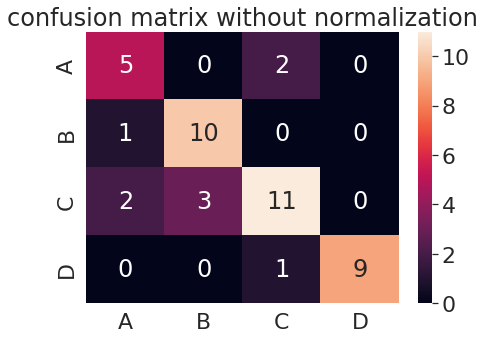

In [16]:
arr = [[5, 0, 2, 0],
       [1, 10, 0, 0],
       [2, 3, 11, 0],
       [0, 0, 1, 9]]
df = DataFrame(arr, index=[i for i in 'ABCD'],
               columns=[i for i in 'ABCD'])

plt.figure(figsize=(7, 5))
plt.title('confusion matrix without normalization')
sns.heatmap(df, annot=True)

* 정규화(normalization) 한 혼동행렬(confusion matrix)

In [18]:
total = np.sum(arr, axis=1)
arr2 = arr/total[:,None]
arr2

array([[0.71428571, 0.        , 0.28571429, 0.        ],
       [0.09090909, 0.90909091, 0.        , 0.        ],
       [0.125     , 0.1875    , 0.6875    , 0.        ],
       [0.        , 0.        , 0.1       , 0.9       ]])

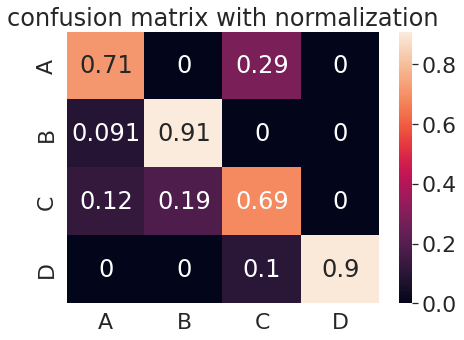

In [19]:
df2 = DataFrame(arr2, index=[i for i in 'ABCD'],
                columns=[i for i in 'ABCD'])
plt.figure(figsize=(7, 5))
plt.title('confusion matrix with normalization')
sns.heatmap(df2, annot=True)

***

## plot_confusion_matrix
### 1. Basic confusion matrix
* sklearn의 plot_confusion_matrix는 Heatmap처럼 confusion matrix를 시각화 하는 함수로써 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자를 나타냄.

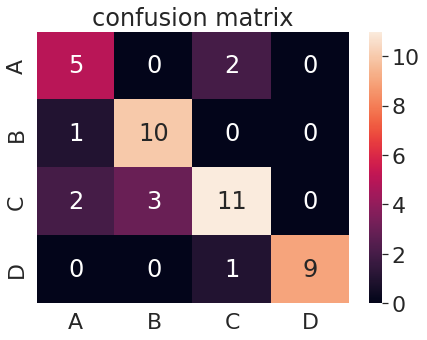

In [40]:
label=['anger', 'happiness', 'fear', 'sadness', 'neutral'] # 라벨 설정
plot = plot_confusion_matrix(clf, # 분류 모델
                             X_test_scaled, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Blue, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')